<a href="https://colab.research.google.com/github/charlesincharge/Caltech-CS155-2022/blob/main/sets/set1/3_notebook_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [ ]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [ ]:
'''
todo: append a 1 to all of the x coordinates at the beginning for gradient
'''

def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
    bias_X = np.insert(X, 0, [1]*len(X), axis = 1)
    f_vals = np.dot(bias_X, w)
    squared_errors = (Y - f_vals) ** 2

    return sum(squared_errors)

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to w. 
    '''

    #==============================================
    # TODO: Implement the gradient of the
    # loss function.
    #==============================================
    new_x = np.insert(x, 0, 1)    
    f_val = np.dot(np.transpose(w), new_x)
    difference = (y - f_val)
    return -2*difference*new_x

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================    

    curr_w = w_start
    w_history = []
    losses_history = []
    ind_order = np.random.permutation(len(X))
    #print(ind_order)
    for i in range(N_epochs):
      for j in ind_order:
        curr_w = curr_w - eta * gradient(X[j].T, Y[j], curr_w)
      w_history.append(curr_w)
      losses_history.append(loss(X, Y, curr_w))
    #print(w_history)
    #print(losses_history)
    return curr_w, losses_history

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [ ]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================

# The following should help you get started:
data = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set1/data/sgd_data.csv')
X = data[:, 0:4]

Y = data[:, 4]
print(SGD(X, Y, np.asarray([0.001,0.001,0.001,0.001,0.001]).T, np.exp(-15), 800)[0])

[ -0.22723611  -5.94213574   3.94382492 -11.72389006   8.78558438]


## Problem 3G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

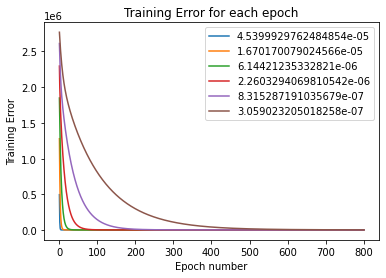

In [ ]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
#==============================================


eta_vals = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]
w_start = [0.001, 0.001, 0.001, 0.001, 0.001]
N_epochs = 800
losses = []
for i in eta_vals:
  plt.plot(range(1, 801), SGD(X, Y, w_start, i, N_epochs)[1], label="{}".format(str(i)))
plt.title("Training Error for each epoch")
plt.xlabel("Epoch number")
plt.ylabel("Training Error")
plt.legend()
plt.show()

## Problem 3H

Provide your code for computing the least-squares analytical solution below.

In [ ]:
#==============================================
# TODO: implement the least-squares
# analytical solution.
#==============================================
first_component = 0
second_component = 0
new_X = np.insert(X, 0, [1]*len(X), axis = 1)
'''
for i in range(len(new_X)):
  first_component += np.dot(new_X[i], new_X[i].T)
  second_component += new_X[i] * Y[i]
'''
np.dot(np.dot(np.linalg.inv(np.dot(new_X.T, new_X)), new_X.T), Y)
#print((first_component**(-1)) * second_component)


array([ -0.31644251,  -5.99157048,   4.01509955, -11.93325972,
         8.99061096])